## @ Import coordiantion data and edge infromation (by Dijkstra) data

In [3]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

# load coordination
XYZ_Coord = scipy.io.loadmat('data\XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

C:\Users\User\.conda\envs\KFC\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


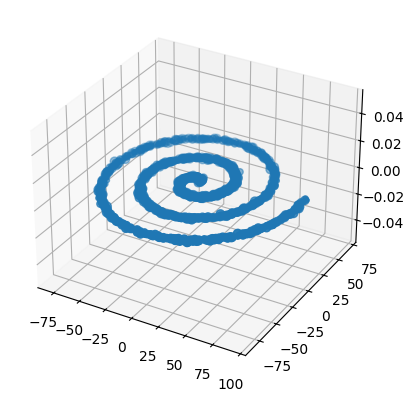

In [4]:
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
fig1 = plt.figure()
plt.axes(projection='3d')
plt.scatter(x, y, z,  )
# plt.view_init(80, 0)

@ plt.scatter is used for 2D plots, and without direct association to a specific Axes3D object, it might not automatically handle the z data correctly for 3D plotting. By using the object-oriented API "ax.scatter(x, y, z)" instead of the pyplot API "plt.scatter(x, y, z)", you're ensuring that the 3D context is correctly maintained.

@ matplotlib ==> pyplot ==> Axes3D object

@ API : Application Programming Interface

  Pyplot 是 matplotlib 的一個介面，它提供了一套類似於 MATLAB 的命令風格函數，方便用戶進行繪圖。你可以將它看作是 matplotlib 功能的“第一層”，因為它提供了快速繪圖的方法，而不需要深入瞭解底層的實現細節。
  當需要更細緻地控制圖表，比如調整3D圖表的視角時，就需要使用 matplotlib 的更基礎層次，即直接操作 Axes 對象。在3D繪圖的情況下，這個 Axes 對象就是 Axes3D。這可以被看作是功能的“第二層”，因為它提供了更豐富的控制選項和更精細的圖形處理能力。
  你不必將 pyplot “變成”一個物件來呼叫 Axes3D。實際上，你是通過 pyplot 來創建一個圖形（Figure）和一個或多個軸（Axes）的實例。在創建軸的時候，如果你指定了 projection='3d' 參數，matplotlib 就會知道你想要創建一個用於3D繪圖的 Axes3D 對象。之後，你就可以直接在這個 Axes3D 對象上呼叫方法來繪製3D圖形或調整視角。

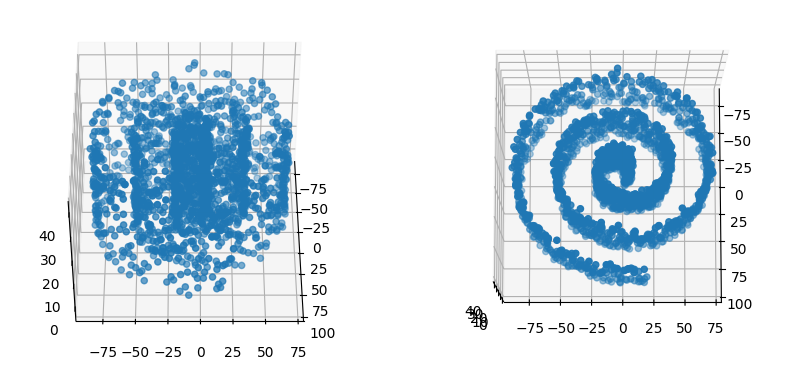

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]

fig = plt.figure(figsize=(20, 10))

# ax = plt.axes(projection='3d')   
ax = fig.add_subplot(211, projection='3d')  
ax.scatter(x, y, z, )
ax.view_init(80, 0)

# fig2 = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(x, y, z, )
ax.view_init(45, 0)

Dijkstra algorithm, ref:
https://ithelp.ithome.com.tw/m/articles/10209593


In [7]:
# Edges.csv is determined by Dijkstra algorithm
XYZ_Edges = pd.read_csv('data\Edges.csv')
XYZ_Edges

,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
...,...,...,...,...
6031,1995,2000,0.104098,Undirected
6032,1996,1997,0.213520,Undirected
6033,1997,1999,0.154084,Undirected
6034,1997,2000,0.140709,Undirected


In [8]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.0000000e+00, 5.0000000e+00, 1.2537038e+00],
       [1.0000000e+00, 1.4000000e+01, 1.2770934e+00],
       [1.0000000e+00, 1.6000000e+01, 3.4546397e-01],
       ...,
       [1.9970000e+03, 1.9990000e+03, 1.5408415e-01],
       [1.9970000e+03, 2.0000000e+03, 1.4070934e-01],
       [1.9990000e+03, 2.0000000e+03, 4.2014991e-01]])

## @ Calculate Modularity
#### Use the following command to install the required package.
#### Installation : conda install python-louvain networkx
#### https://python-louvain.readthedocs.io/en/latest/index.html
#### https://networkx.github.io/documentation/stable/index.html

In [10]:
# import data into networkx
import community
import networkx as nx
import matplotlib.pyplot as plt

# Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()

# for i in range(0, len(XYZ_E)):    
#     e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] )     # i : ith row; str():string~ e can be string, number, ...
#     G.add_weighted_edges_from([(e)])                                   # build graph
# OR

G.add_weighted_edges_from(XYZ_Edges.iloc[:,0:3].values) 

print(G)

Graph with 2000 nodes and 6036 edges


In [11]:
# calculate modularity
# 執行 Louvain 社群偵測算法並將結果存儲在 partition 變數中，儲存的值會以dict儲存，.value() 是分配給該節點的社群標識符，.keys()為對應的節點編號
partition = community.best_partition(G)   
# 所有節點的社群標識符的總數
size = float(len(set(partition.values())))
print("community:", size)
#給定劃分的模塊性 Q，這是一個值介於 -0.5（如果邊的分佈完全隨機）和 1（如果社群內部的連結非常緊密而且社群之間幾乎沒有連結）之間的指標。
mod = community.modularity(partition,G)
print("modularity:", mod)

community: 45.0
modularity: 0.9375746494623839


In [12]:
partition
#cluster 0 : 1,5,14,16,17,.....; cluster 1 : 2,15,22,27,41....

{1.0: 0,
 5.0: 0,
 14.0: 0,
 16.0: 0,
 17.0: 0,
 19.0: 0,
 25.0: 0,
 58.0: 0,
 2.0: 1,
 8.0: 2,
 15.0: 3,
 22.0: 1,
 27.0: 1,
 41.0: 1,
 44.0: 1,
 3.0: 3,
 6.0: 3,
 18.0: 3,
 21.0: 3,
 26.0: 3,
 33.0: 3,
 35.0: 3,
 45.0: 3,
 56.0: 3,
 4.0: 4,
 7.0: 4,
 11.0: 4,
 29.0: 4,
 32.0: 4,
 37.0: 4,
 49.0: 4,
 52.0: 4,
 68.0: 4,
 92.0: 0,
 39.0: 4,
 70.0: 3,
 9.0: 2,
 10.0: 2,
 24.0: 2,
 59.0: 1,
 20.0: 2,
 46.0: 2,
 79.0: 2,
 31.0: 2,
 74.0: 2,
 12.0: 0,
 13.0: 0,
 34.0: 0,
 36.0: 0,
 53.0: 0,
 90.0: 0,
 62.0: 0,
 23.0: 3,
 30.0: 3,
 66.0: 0,
 43.0: 2,
 54.0: 2,
 73.0: 2,
 121.0: 2,
 63.0: 0,
 77.0: 1,
 84.0: 1,
 102.0: 1,
 28.0: 1,
 61.0: 1,
 64.0: 1,
 67.0: 1,
 108.0: 1,
 89.0: 2,
 91.0: 2,
 60.0: 4,
 76.0: 4,
 57.0: 0,
 55.0: 4,
 47.0: 4,
 51.0: 4,
 72.0: 4,
 82.0: 4,
 38.0: 4,
 42.0: 4,
 48.0: 4,
 96.0: 4,
 78.0: 1,
 40.0: 1,
 50.0: 1,
 69.0: 1,
 80.0: 1,
 85.0: 1,
 106.0: 1,
 112.0: 1,
 95.0: 2,
 71.0: 2,
 94.0: 4,
 103.0: 4,
 124.0: 4,
 99.0: 4,
 65.0: 0,
 93.0: 0,
 81.0: 1,
 75.0: 0,
 8

In [13]:
partition.keys()

dict_keys([1.0, 5.0, 14.0, 16.0, 17.0, 19.0, 25.0, 58.0, 2.0, 8.0, 15.0, 22.0, 27.0, 41.0, 44.0, 3.0, 6.0, 18.0, 21.0, 26.0, 33.0, 35.0, 45.0, 56.0, 4.0, 7.0, 11.0, 29.0, 32.0, 37.0, 49.0, 52.0, 68.0, 92.0, 39.0, 70.0, 9.0, 10.0, 24.0, 59.0, 20.0, 46.0, 79.0, 31.0, 74.0, 12.0, 13.0, 34.0, 36.0, 53.0, 90.0, 62.0, 23.0, 30.0, 66.0, 43.0, 54.0, 73.0, 121.0, 63.0, 77.0, 84.0, 102.0, 28.0, 61.0, 64.0, 67.0, 108.0, 89.0, 91.0, 60.0, 76.0, 57.0, 55.0, 47.0, 51.0, 72.0, 82.0, 38.0, 42.0, 48.0, 96.0, 78.0, 40.0, 50.0, 69.0, 80.0, 85.0, 106.0, 112.0, 95.0, 71.0, 94.0, 103.0, 124.0, 99.0, 65.0, 93.0, 81.0, 75.0, 87.0, 88.0, 97.0, 134.0, 113.0, 110.0, 131.0, 144.0, 129.0, 100.0, 109.0, 83.0, 86.0, 115.0, 122.0, 126.0, 98.0, 111.0, 116.0, 117.0, 127.0, 105.0, 101.0, 107.0, 132.0, 155.0, 118.0, 133.0, 119.0, 104.0, 114.0, 128.0, 139.0, 163.0, 135.0, 171.0, 159.0, 158.0, 151.0, 120.0, 140.0, 147.0, 125.0, 138.0, 148.0, 123.0, 130.0, 146.0, 154.0, 164.0, 145.0, 153.0, 150.0, 167.0, 137.0, 141.0, 173.0

In [35]:
partition.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 4, 4, 2, 2, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1, 5, 0, 0, 4, 4, 0, 1, 1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 2, 3, 3, 7, 4, 4, 4, 3, 6, 6, 6, 6, 6, 7, 7, 4, 6, 5, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 4, 4, 5, 7, 4, 4, 5, 7, 4, 4, 4, 4, 4, 4, 6, 6, 6, 4, 5, 5, 5, 5, 6, 7, 7, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 6, 6, 4, 7, 4, 6, 6, 6, 7, 7, 7, 4, 4, 5, 6, 6, 6, 7, 7, 7, 6, 6, 7, 6, 6, 7, 5, 5, 6, 4, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 8, 6, 6, 7, 7, 7, 4, 7, 7, 4, 6, 6, 6, 6, 6, 8, 7, 7, 9, 8, 8, 6, 7, 7, 5, 10, 7, 7, 8, 5, 5, 5, 8, 8, 8, 8, 8, 5, 7, 7, 7, 10, 9, 8, 8, 9, 8, 5, 5, 10, 10, 10, 10, 10, 8, 8, 8, 9, 9, 9, 5, 5, 8, 8, 5, 9, 9, 9, 9, 9, 9, 10, 9, 10, 10, 10, 9, 9, 9, 8, 8, 8, 8, 9, 9

## @assign node color based on community label in "network"


Community 0
[1.0, 5.0, 14.0, 16.0, 17.0, 19.0, 25.0, 58.0, 92.0, 12.0, 13.0, 34.0, 36.0, 53.0, 90.0, 62.0, 66.0, 63.0, 57.0, 65.0, 93.0, 75.0, 87.0, 88.0, 113.0, 110.0, 129.0, 83.0, 86.0, 115.0, 126.0, 98.0, 111.0, 116.0, 117.0, 127.0]
Community 1
[2.0, 22.0, 27.0, 41.0, 44.0, 59.0, 77.0, 84.0, 102.0, 28.0, 61.0, 64.0, 67.0, 108.0, 78.0, 40.0, 50.0, 69.0, 80.0, 85.0, 106.0, 112.0, 81.0, 97.0, 131.0, 144.0, 100.0, 109.0, 155.0, 118.0, 133.0, 159.0, 120.0, 140.0, 147.0, 125.0, 138.0, 148.0, 145.0, 153.0, 137.0, 141.0, 136.0, 157.0, 160.0, 142.0, 166.0, 175.0, 169.0]
Community 2
[8.0, 9.0, 10.0, 24.0, 20.0, 46.0, 79.0, 31.0, 74.0, 43.0, 54.0, 73.0, 121.0, 89.0, 91.0, 95.0, 71.0, 105.0]
Community 3
[15.0, 3.0, 6.0, 18.0, 21.0, 26.0, 33.0, 35.0, 45.0, 56.0, 70.0, 23.0, 30.0]
Community 4
[4.0, 7.0, 11.0, 29.0, 32.0, 37.0, 49.0, 52.0, 68.0, 39.0, 60.0, 76.0, 55.0, 47.0, 51.0, 72.0, 82.0, 38.0, 42.0, 48.0, 96.0, 94.0, 103.0, 124.0, 99.0, 101.0, 107.0, 119.0]
Community 5
[134.0, 151.0, 150.0, 1

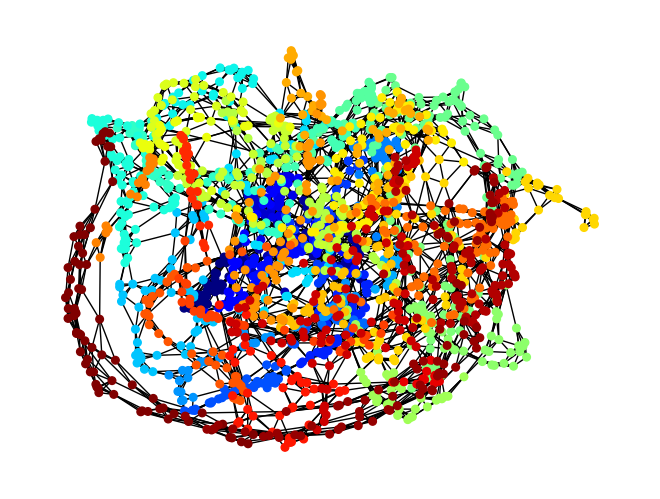

In [14]:
# assign node color based on community label in "network"
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]

##  ==== the code above is the same as below ====
    # members = []  # 創建一個空列表來儲存節點
    # for node in partition.keys():  # 迭代每一個節點
    #     if partition[node] == com:  # 如果該節點屬於社群 'com'
    #         members.append(node)  # 將節點添加到列表中    
    
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

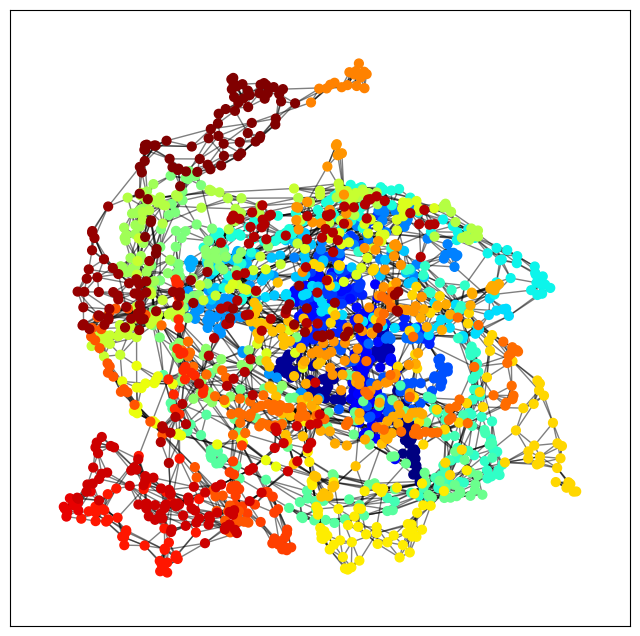

In [15]:
# draw the network map  
pos = nx.spring_layout(G)
cmap = plt.get_cmap('jet')
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

## @Assign node color based on community label in "real coordination"


In [44]:
# assign node color based on community label in "real coordination"

import numpy as np
import matplotlib.pyplot as plt

label = np.zeros(len(XYZ_C))  # Assuming XYZ_C is a list or array of coordinates
for j in set(partition.values()):
    for i in range(len(XYZ_C)):
        if partition.get(float(i + 1)) == j:  # Use float to access the keys            
            label[i] = j
labelRE = label  # No need to reshape since label is already a 1D array


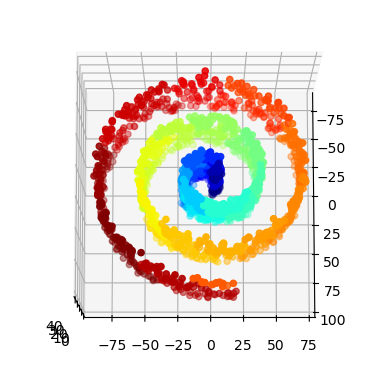

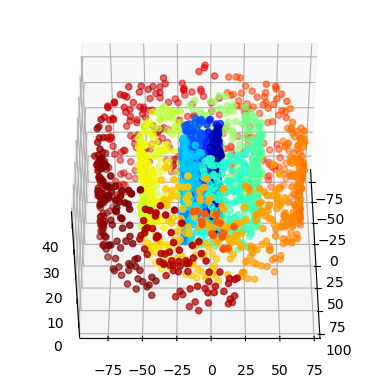

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

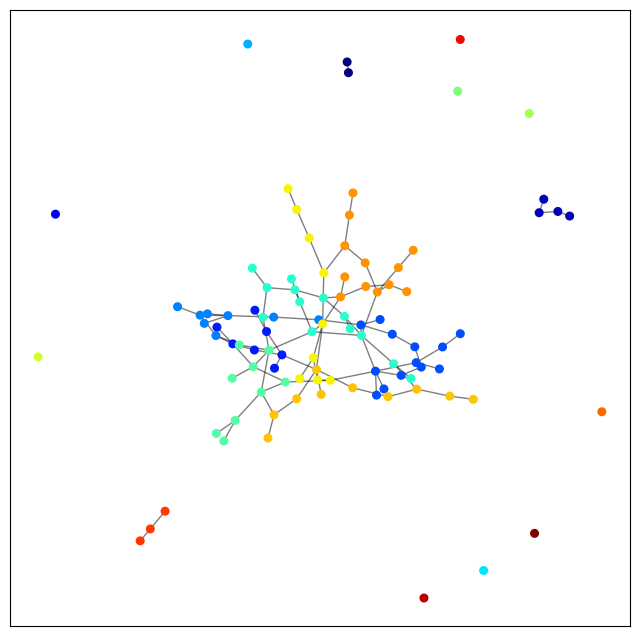

In [72]:
# 範例： 創建一個網絡
import community as community_louvain
G = nx.erdos_renyi_graph(100, 0.02)  #0.15 是用於生成 Erdős-Rényi 隨機圖的 p 參數，這個參數表示圖中任意兩個節點之間建立邊的概率。

# 使用Louvain算法找到社群結構
partition = community_louvain.best_partition(G)

# 繪製結果

# nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = list(partition.values()), node_size = 30, with_labels = False)

pos = nx.spring_layout(G)
cmap = plt.get_cmap('jet')
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=30, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()